<img src="https://drive.google.com/uc?export=view&id=1WNLKH10YpQNNk9eeRIyYLwGkxNbNp-Mm" width="100%">

# Integrantes
* Ivonne Ruiz
* David Ovalle
* Juan Escobar

# Modelamiento y Evaluación
---
En este notebook se abordará la aplicación de diferentes modelos de aprendizaje supervisado orientados al análisis de sentimientos en el ámbito del Procesamiento de Lenguaje Natural (NLP). Para ello, se empleará la base de datos "Sentiment Analysis for Mental Health" disponible en Kaggle, la cual contiene textos etiquetados según su carga emocional y relevancia en temas de salud mental. En principio, procedemos a importar las librerías necesarias para el análisis:

In [3]:
!pip install --upgrade --force-reinstall numpy pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas

In [1]:
!pip install --upgrade --force-reinstall numpy gensim

  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
Using cached scipy-1.13.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.3
    Uninstalling wrapt-1.17.3:
      Successfully uninstalled wrap

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import logging

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from gensim.models.doc2vec import Doc2Vec
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Una vez importadas las librerías necesarias para el análisis, procedemos a importar directamente desde el repositorio de nuestro proyecto en Github la base de datos limpia y preprocesada resultante de fases anteriores:

In [2]:
url = 'https://github.com/Dovallec/mental-health-sentiment-analysis_NLP/raw/master/data_procesada.xlsx'
df = pd.read_excel(url)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52440 entries, 0 to 52439
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   texto_limpio  52440 non-null  object
 1   status        52440 non-null  object
dtypes: object(2)
memory usage: 819.5+ KB
None


texto_limpio   status
0                                            oh gosh  Anxiety
1    trouble sleep confused mind restless heart tune  Anxiety
2  wrong dear forward doubt stay restless restles...  Anxiety
3                                shift focus worried  Anxiety
4                  restless restless month boy mean   Anxiety

Para esta fase del proyecto, centraremos el modelamiento en métodos supervisados de aprendizaje automático, aprovechando que contamos con una base de datos etiquetada que facilita la tarea de clasificación de sentimientos. Adicionalmente, vamos a realizar el ejercicio con un enfoque no supervisado para realizar comparaciones y analizar los resultados en el caso de no considerar las etiquetas.  De esta forma podemos identificar si es posible asignar o eliminar las etiquetas ya pre establecidas del conjunto de datos.

La elección de trabajar con análisis de sentimientos en textos sobre salud mental responde a la creciente importancia de identificar y comprender patrones emocionales en entornos digitales, donde las personas suelen expresar abiertamente su estado anímico. La adecuada clasificación automática de estos sentimientos puede aportar valor en ámbitos de monitoreo, prevención e intervención psicológica, facilitando la detección temprana de situaciones de riesgo y permitiendo un acompañamiento más oportuno. Además, el uso de modelos supervisados permite evaluar y perfeccionar técnicas de NLP aplicadas a contextos sensibles y de alta relevancia social, promoviendo así avances tanto en el campo tecnológico como en el ámbito de la salud pública.

## **Modelo 1 -> Regresión Logística Multinomial**

### **1. Tipo de Modelamiento**
---

Este primer modelo consiste en aplicar Regresión Logística multinomial sobre representaciones TF-IDF para realizar clasificación supervisada multiclase. Esta combinación se elige por su alta eficiencia computacional y su robustez en tareas de texto.

La Regresión Logística multinomial en scikit-learn se encarga automáticamente de la clasificación entre múltiples categorías, eligiendo como salida la clase que tiene la mayor probabilidad predicha por el modelo (vía softmax).

### **2. Implementación del modelo**
---

### **2.1. Importar Modelo**
---

En primer lugar, se crea una copia del dataframe original con el propósito de proteger la integridad de los datos durante el desarrollo de este primer modelo. A continuación, el dataset se divide en dos subconjuntos, uno de entrenamiento y otro de prueba, utilizando la función train_test_split. En este proceso, se asigna el 20% de los datos al conjunto de prueba y el 80% restante al conjunto de entrenamiento. Además, se utiliza el parámetro stratify=y_1, lo que garantiza que la proporción de clases se mantenga constante en ambos subconjuntos. Esto es particularmente importante en escenarios de desbalance de clases, como el del presente caso, ya que asegura que todas las clases estén representadas de manera proporcional tanto en el entrenamiento como en la evaluación, evitando sesgos y mejorando la validez de las métricas obtenidas en el conjunto de prueba. Finalmente, se especifica random_state=0 para lograr reproducibilidad en la división de los datos.

In [3]:
# Copia del dataframe original
df_1 = df.copy()

# División de variables y etiquetado numérico
X_1 = df_1['texto_limpio']
y_1 = df_1['status'].astype('category').cat.codes.values

# División entrenamiento/prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.2, random_state=0, stratify=y_1)

Posteriormente, se procede a utilizar el vectorizador TF-IDF para convertir los textos en vectores numéricos, preservando la importancia relativa de las palabras y ngramas frecuentes en cada clase. Se opta por un máximo de 3,000 características y ngramas de 1 y 2 palabras para capturar tanto el vocabulario como algunas expresiones frecuentes, sin sobrecargar la memoria.

In [ ]:
# Vectorización TF-IDF
vectorizer_1 = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf_1 = vectorizer_1.fit_transform(X_train_1)
X_test_tfidf_1 = vectorizer_1.transform(X_test_1)

Resulta fundamental graficar la distribución de las etiquetas para identificar visualmente el desbalance de clases presente en el dataset, ya que este factor puede influir significativamente en el desempeño del modelo y en la interpretación de sus métricas. En la siguiente figura se evidencia que las clases mayoritarias corresponden a "Normal" y "Depression", mientras que "Personality disorder" destaca como la categoría menos representada. Este análisis preliminar permite anticipar desafíos específicos en la predicción de las clases minoritarias y resalta la importancia de utilizar técnicas adecuadas para mitigar el impacto del desbalance durante el entrenamiento y la evaluación del modelo.

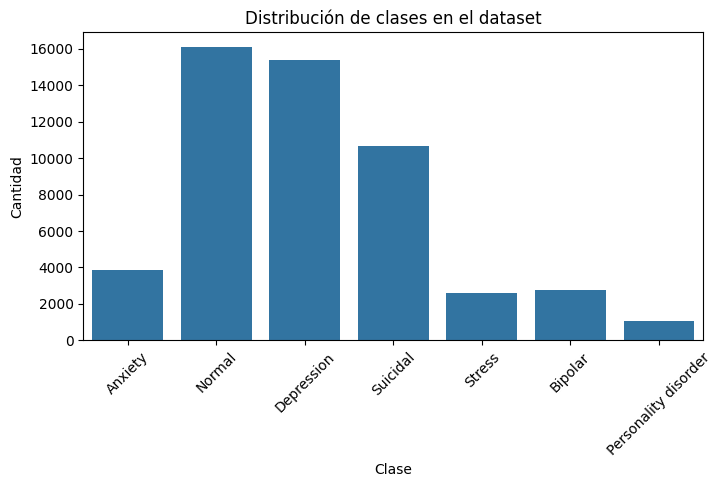

In [ ]:
# Visualización de la distribución de clases
plt.figure(figsize=(8,4))
sns.countplot(x=df_1['status'])
plt.title('Distribución de clases en el dataset')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Como se mencionó previamente, el desbalance de clases puede perjudicar el aprendizaje del modelo, haciendo que favorezca las categorías más frecuentes. Para mitigar este efecto, se utiliza class_weight='balanced', que penaliza más los errores en clases minoritarias durante el entrenamiento.
El modelo se entrena durante pocas iteraciones (max_iter=200), debido a que se considera suficiente para el tamaño del dataset y la propia simplicidad del modelo.

In [ ]:
# Entrenamiento del modelo de Regresión Logística
modelo_lr_1 = LogisticRegression(max_iter=200,
                                 solver='lbfgs',
                                 n_jobs=-1,
                                 class_weight='balanced')
modelo_lr_1.fit(X_train_tfidf_1, y_train_1)


LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1)

### **3. Evaluación o Aplicación del modelo**
---

Para evaluar el modelo, en principio se procede a generar el reporte de resultados:

In [ ]:
# Predicción de clases en los textos de prueba
y_pred_1 = modelo_lr_1.predict(X_test_tfidf_1)

# Reporte de desempeño
print("Accuracy:", accuracy_score(y_test_1, y_pred_1))

# Extraemos los nombres reales de las clases para graficar
class_names_1 = df_1['status'].astype('category').cat.categories.tolist()

print(classification_report(y_test_1, y_pred_1, target_names=class_names_1))


Accuracy: 0.727116704805492
                      precision    recall  f1-score   support

             Anxiety       0.74      0.83      0.78       768
             Bipolar       0.70      0.77      0.73       556
          Depression       0.78      0.55      0.65      3080
              Normal       0.88      0.90      0.89      3222
Personality disorder       0.34      0.70      0.46       215
              Stress       0.40      0.64      0.49       517
            Suicidal       0.65      0.70      0.67      2130

            accuracy                           0.73     10488
           macro avg       0.64      0.73      0.67     10488
        weighted avg       0.75      0.73      0.73     10488



El modelo de Regresión Logística ajustado con penalización por desbalance de clases logra una exactitud general del 73%, lo cual es un resultado sólido considerando la simplicidad del método y el desbalance presente en el conjunto de datos. Se observa un buen desempeño en las clases con mayor representación, como "Normal" y "Anxiety", donde el f1-score es alto y el recall supera el 80%, lo que indica que el modelo identifica correctamente la mayoría de los casos en estas categorías. Sin embargo, la performance disminuye notablemente en las clases minoritarias, como "Personality disorder" y "Stress", donde el f1-score cae por debajo de 0.5 y la precisión es baja, evidenciando que el modelo aún enfrenta dificultades para discriminar patrones menos representados en los datos.

Estos resultados refuerzan la utilidad del ajuste de pesos en el modelo y la importancia de visualizar diferentes métricas más allá de la accuracy global. Para este fin, se procede a graficar la matriz de confusión con los resultados del modelo:


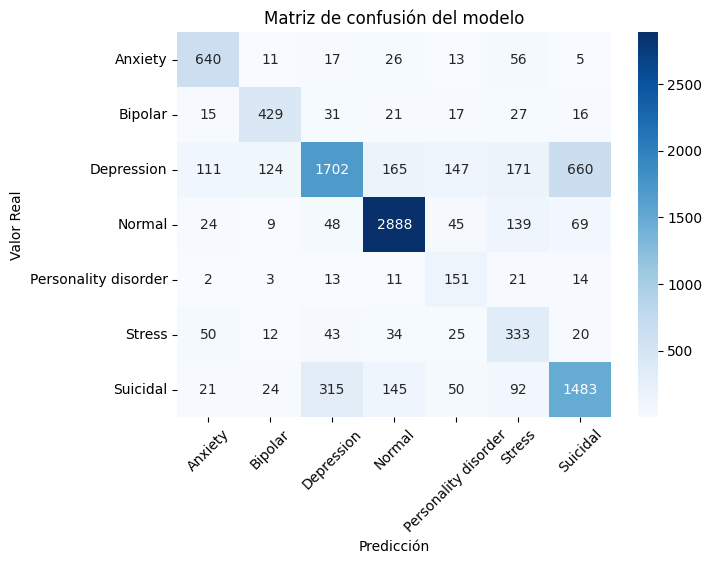

In [ ]:
# Matriz de confusión con nombres de clase
cm_1 = confusion_matrix(y_test_1, y_pred_1)

plt.figure(figsize=(7,5))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_1, yticklabels=class_names_1)
plt.title('Matriz de confusión del modelo')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.xticks(rotation=45)
plt.show()


A continuación se procede a graficar la exactitud por clase, entendida como la proporción de aciertos del modelo sobre el total de muestras reales de cada categoría (es decir, el número de predicciones correctas respecto al total de instancias verdaderas para cada clase). Esta métrica permite evaluar, para cada etiqueta específica, qué tan bien es identificada por el modelo independientemente de su frecuencia en el conjunto de datos.

Visualizar la exactitud por clase resulta especialmente útil en contextos de desbalance de clases, ya que otorga una perspectiva desglosada y equitativa sobre el rendimiento, facilitando la detección de posibles sesgos hacia las clases mayoritarias y brindando información valiosa sobre la capacidad real del sistema para reconocer correctamente también las minoritarias. Por ello, esta gráfica complementa la interpretación ofrecida por la accuracy global, permitiendo un análisis más detallado y justo de la calidad del modelo multiclase.

La exactitud por clase se calcula así:

$$
\text{Exactitud por clase}_i = \frac{\text{Predicciones correctas en la clase } i}{\text{Total de muestras reales de la clase } i} = \frac{TP_i}{TP_i + FN_i}
$$

Donde $TP_i$ representa los verdaderos positivos para la clase $i$ y $FN_i$ los falsos negativos de la clase $i$.



In [ ]:
accuracies = np.diag(cm_1) / np.sum(cm_1, axis=1)
accuracies

array([0.83333333, 0.77158273, 0.5525974 , 0.89633768, 0.70232558,
       0.64410058, 0.69624413])

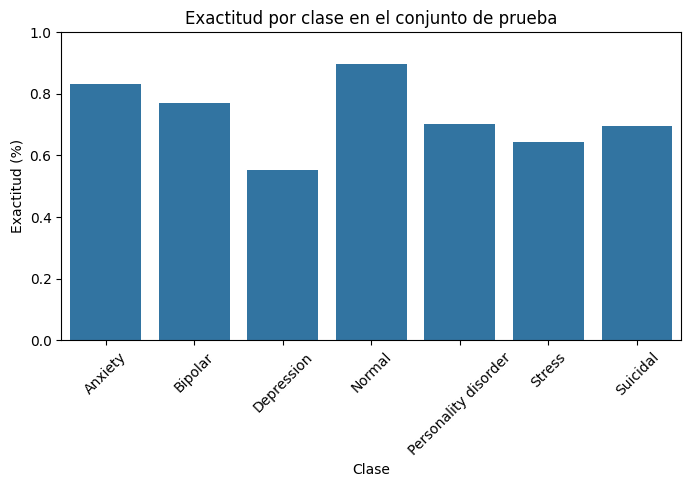

In [ ]:
# Visualización exactitud por clase
plt.figure(figsize=(8,4))
sns.barplot(x=class_names_1, y=accuracies)
plt.title('Exactitud por clase en el conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Exactitud (%)')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

Finalmente, al construir la gráfica de exactitud por clase en el conjunto de prueba, se observa que a pesar del notable desbalance en el número de muestras de cada clase, el modelo logra mantener una precisión relativamente homogénea en la mayoría de las categorías. Si bien la clase "Normal" sobresale con una exactitud superior y "Depression" muestra una leve disminución frente a las demás, el desempeño se distribuye de manera equilibrada en todo el espectro de etiquetas, evitando caídas abruptas propias de modelos que no consideran el desbalance en su entrenamiento. Este resultado evidencia la efectividad del ajuste de pesos en la regresión logística y su capacidad para captar patrones relevantes en clases minoritarias, constituyendo una línea base sólida para futuras mejoras en el análisis de sentimientos en textos vinculados a la salud mental.

## **Modelo 2 -> Random Forest**

### **1. Tipo de Modelamiento**
---



El siguiente modelo corresponde a un Random Forest, el cual está compuesto por múltiples árboles de decisión. Cada árbol genera su propia predicción y, posteriormente, estas se combinan (ya sea mediante votación o promediado) para obtener un resultado conjunto. Es importante destacar que cada árbol se entrena con una muestra aleatoria del conjunto de datos. A diferencia de un árbol de decisión individual, el Random Forest reduce el overfitting, gracias a la diversidad y cantidad de árboles que conforman el modelo.

### **2. Implementación del modelo**
---

### **2.1. Importar Modelo**
---

A continuación, se presentan los pasos para el desarrollo del modelo. Se comienza realizando una copia del dataset para trabajar específicamente con este modelo. En primer lugar, se utiliza un CountVectorizer para evaluar el desempeño inicial del modelo. Posteriormente, se emplea una representación TF-IDF con el objetivo de comparar ambos enfoques y determinar cuál ofrece mejores resultados al momento de realizar las predicciones.

In [ ]:
# Copia del dataframe original
df_2 = df.copy()

### **2.2 Word2vect**

In [ ]:
vect = CountVectorizer(max_features=5000).fit(df_2.texto_limpio)
display(vect)

CountVectorizer(max_features=5000)

In [ ]:
features = vect.transform(df_2.texto_limpio).toarray()
display(features.shape)

(52440, 5000)

### **2.3 TF-IDF**

Vectorizamos usando la representación TF-IDF

In [ ]:
# Vectorización TF-IDF
vect_2 = TfidfVectorizer(max_features=5000,max_df=0.7,norm='l2',sublinear_tf=True).fit(df_2.texto_limpio)

In [ ]:
X_TF = vect_2.transform(df_2.texto_limpio).toarray()

### 2.4 Etiquetado

Usamos `LabelEncoder` para convertir las clases en formato numérico. La codificación es la siguiente:

- `0` → Anxiety
- `1` → Bipolar
- `2` → Depression
- `3` → Normal
- `4` → Personality Disorder
- `5` → Stress
- `6` → Suicidal

In [ ]:
labeler = LabelEncoder().fit(df_2.status)

In [ ]:
labels =labeler.transform(df_2.status)
display(np.unique(labels))

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
display(labels)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
display(labeler.classes_)

array(['Anxiety', 'Bipolar', 'Depression', 'Normal',
       'Personality disorder', 'Stress', 'Suicidal'], dtype=object)

### **División entre conjunto de entrenamiento y prueba**

Separamos los datos en **conjunto de entrenamiento** y **conjunto de prueba** para evaluar el rendimiento del modelo. Esto nos permite entrenar el modelo con una parte de los datos y luego probar su capacidad de generalización con datos que no ha visto antes.


In [ ]:
# Train test split con representacion word2vect
features_train,features_test, labels_train, labels_test = train_test_split(features,
                                                                           labels,
                                                                           random_state = 30,
                                                                           test_size = 0.2,
                                                                           stratify = labels)

In [ ]:
# Train test split con representacion TF-IDF
features_train_tf,features_test_tf, labels_train_tf, labels_test_tf = train_test_split(X_TF,
                                                                           labels,
                                                                           random_state = 30,
                                                                           test_size = 0.2,
                                                                           stratify = labels)

In [ ]:
display(features_train.shape)
display(features_test.shape)

(41952, 5000)

(10488, 5000)

### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Se importó la librería GridSearchCV de scikit-learn para la búsqueda de los mejores hiperparámetros de nuestro Random Forest. Sin embargo, por motivos de tiempo y rendimiento, se limitaron ligeramente los rangos de los hiperparámetros para reducir el tiempo de entrenamiento.

In [ ]:
rf = RandomForestClassifier(random_state = 30)

In [ ]:
param_grid = {'n_estimators': [100],
              'max_depth': [None,10,20],
              'min_samples_split':[2,5,4],
              'max_features': ['sqrt','log2']}

In [ ]:
grid_search = GridSearchCV(rf,
                           param_grid=param_grid,
                           cv = 5,
                           scoring ='accuracy',
                           return_train_score = True
                           )

### resultados model con TF-IDF

In [ ]:
start_time =time.time()
grid_search.fit(features_train_tf,labels_train_tf)
end_time = time.time()
lapso = end_time - start_time

In [ ]:
print(lapso/60)

96.23774915536245


In [ ]:
# Resultados TF-IDF
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2     178.995871      1.812379         1.493905        0.034144   
0     180.313379      1.372340         1.483196        0.023609   
1     175.477462      0.600612         1.531126        0.169471   
4      73.813864      0.917494         2.002198        0.112121   
5      74.135619      0.791459         2.091461        0.334300   

  param_max_depth param_max_features  param_min_samples_split  \
2            None               sqrt                        4   
0            None               sqrt                        2   
1            None               sqrt                        5   
4            None               log2                        5   
5            None               log2                        4   

   param_n_estimators                                             params  \
2                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
0                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
1                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
4                 100  {'max_depth': None, 'max_features': 'log2', 'm...   
5                 100  {'max_depth': None, 'max_features': 'log2', 'm...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
2           0.705995  ...         0.707380        0.002823                1   
0           0.707782  ...         0.706975        0.001437                2   
1           0.709093  ...         0.706188        0.002088                3   
4           0.681325  ...         0.680778        0.002169                4   
5           0.680372  ...         0.679824        0.002159                5   

   split0_train_score  split1_train_score  split2_train_score  \
2            0.996454            0.997020            0.997020   
0            0.997765            0.997944            0.997765   
1            0.995888            0.996246            0.996246   
4            0.996484            0.996991            0.996663   
5            0.997080            0.997438            0.997229   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
2            0.997020            0.996991          0.996901         0.000224  
0            0.997974            0.998093          0.997908         0.000127  
1            0.996276            0.996186          0.996168         0.000143  
4            0.996484            0.996663          0.996657         0.000185  
5            0.997348            0.997140          0.997247         0.000131  

[5 rows x 24 columns]

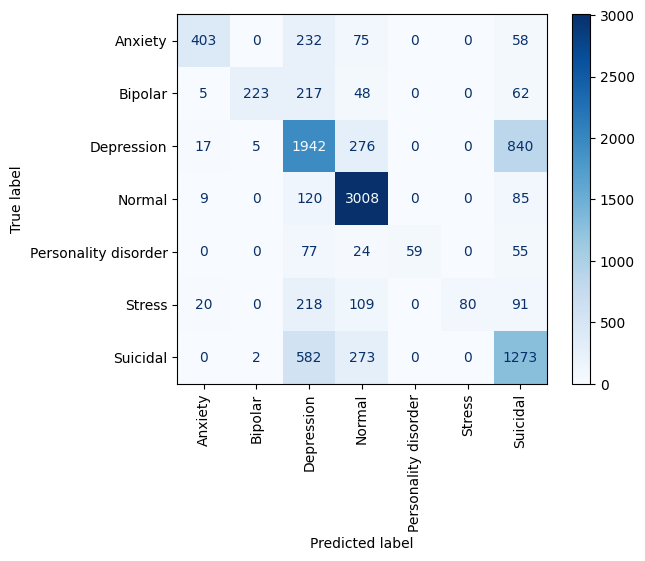

In [ ]:
# Resultados TF-IDF
y_pred_tf= grid_search.predict(features_test)
cm = confusion_matrix(labels_test,y_pred_tf)
# Mostrar de forma grafica la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labeler.classes_)
disp.plot(cmap='Blues',xticks_rotation=90)

In [ ]:
# TF-IDF
print(classification_report(labels_test_tf,y_pred_tf))


              precision    recall  f1-score   support

           0       0.89      0.52      0.66       768
           1       0.97      0.40      0.57       555
           2       0.57      0.63      0.60      3080
           3       0.79      0.93      0.86      3222
           4       1.00      0.27      0.43       215
           5       1.00      0.15      0.27       518
           6       0.52      0.60      0.55      2130

    accuracy                           0.67     10488
   macro avg       0.82      0.50      0.56     10488
weighted avg       0.70      0.67      0.65     10488



En una primera instancia, podemos observar que el modelo presenta un macro average de 0.56, lo que refleja un desempeño poco equilibrado entre las distintas clases. Esto se hace evidente al comparar con el weighted average, que alcanza un valor de 0.65. Este resultado sugiere que las clases con mayor número de muestras resultan más fáciles de predecir para el modelo, como ocurre con las clases 2 y 3.

### Resultados word2vec

In [ ]:
grid_search.fit(features_train,labels_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 4],
                         'n_estimators': [100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Resultados word2vect
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.nlargest(5,'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1     160.112997      1.784566         1.547382        0.209891   
2     160.106596      1.673451         1.608904        0.256545   
0     166.787783      2.389400         1.511122        0.024611   
5      68.521296      0.551976         1.984918        0.221162   
4      70.142432      1.322231         2.232002        0.394728   

  param_max_depth param_max_features  param_min_samples_split  \
1            None               sqrt                        5   
2            None               sqrt                        4   
0            None               sqrt                        2   
5            None               log2                        4   
4            None               log2                        5   

   param_n_estimators                                             params  \
1                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
2                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
0                 100  {'max_depth': None, 'max_features': 'sqrt', 'm...   
5                 100  {'max_depth': None, 'max_features': 'log2', 'm...   
4                 100  {'max_depth': None, 'max_features': 'log2', 'm...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
1           0.708736  ...         0.707022        0.001196                1   
2           0.708378  ...         0.705878        0.001482                2   
0           0.698963  ...         0.701540        0.002570                3   
5           0.677869  ...         0.675081        0.002447                4   
4           0.673340  ...         0.675057        0.002455                5   

   split0_train_score  split1_train_score  split2_train_score  \
1            0.992938            0.993802            0.993624   
2            0.994517            0.995382            0.995054   
0            0.997974            0.998093            0.997974   
5            0.995888            0.996484            0.996127   
4            0.994964            0.995471            0.995143   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
1            0.993892            0.993654          0.993582         0.000336  
2            0.995650            0.995233          0.995167         0.000379  
0            0.998182            0.998212          0.998087         0.000100  
5            0.996633            0.996395          0.996305         0.000266  
4            0.995352            0.995382          0.995262         0.000184  

[5 rows x 24 columns]

como se puede observa en una primera instancia nuestro random forest entrenado con word2vect obtuvo un metrica de 0.7070 para

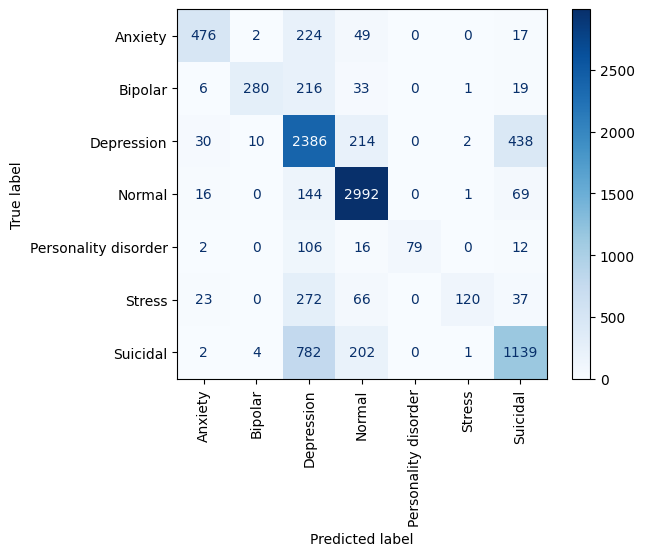

In [ ]:
grid_pred_w2v= grid_search.predict(features_test)
cm = confusion_matrix(labels_test,grid_pred_w2v)
# Mostrar de forma grafica la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labeler.classes_)
disp.plot(cmap='Blues',xticks_rotation=90)

In [ ]:
print(classification_report(labels_test,grid_pred_w2v))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       768
           1       0.95      0.50      0.66       555
           2       0.58      0.77      0.66      3080
           3       0.84      0.93      0.88      3222
           4       1.00      0.37      0.54       215
           5       0.96      0.23      0.37       518
           6       0.66      0.53      0.59      2130

    accuracy                           0.71     10488
   macro avg       0.83      0.57      0.63     10488
weighted avg       0.74      0.71      0.70     10488



El modelo alcanza una exactitud (accuracy) del 71%, lo que supone una mejora respecto al obtenido con TF-IDF. Sin embargo, el macro average (f1 = 0.63) evidencia que el rendimiento sigue siendo desigual entre las distintas clases. En contraste, el weighted average (f1 = 0.70) indica que el modelo ofrece un desempeño aceptable en las clases con mayor cantidad de muestras, compensando parcialmente su limitada efectividad en las clases minoritarias.

### Probando SMOTE para W2V

In [ ]:
# x_train_smote,x_test_smote,y_train_smote,y_test_smote =train_test_split(features,labels,test_size=0.2,random_state = 40)
# smote = SMOTE(random_state=30)
# x_train_res,y_train_res = smote.fit_resample(x_train_smote,y_train_smote)
# grid_search.fit(x_train_res,y_train_res)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
0.7070222579416706


In [ ]:
grid_search.score(features_test,labels_test)

0.7124332570556827

## **Modelo 3 -> K-means**

### **1. Tipo de Modelamiento**
---

Para el análisis no supervisado, la técnica de agrupamiento de textos se utiliza para organizar y categorizar documentos de texto en grupos similares. El objetivo es agrupar los documentos de manera que los documentos dentro de un grupo sean similares entre sí y diferentes de los documentos en otros grupos.  Por lo tanto, es una herramienta para descubrir patrones y relaciones entre documentos, lo que puede ser útil en aplicaciones como el análisis de sentimientos.

K-means es el algoritmo de agrupamiento más utilizado, en especial, cuando se tratan grandes conjuntos de datos como en nuestro caso. Este modelo busca dividir un conjunto de $N$ observaciones en $K$ grupos (donde $K$ es un número especificado previamente) de manera tal que las observaciones dentro de cada grupo son lo más similares posible entre sí.

La idea central es encontrar patrones de forma automática aprendiendo estos patrones a partir del corpus sin considerar las etiquetas.  Por lo que no hay un conjunto de "entrenamiento" y "prueba". Así, vamos a aplicar el vectorizador a todo el conjunto de datos.

### **2. Implementación del modelo**
---

A continuación encuentra los pasos que puede seguir para la implementación de un modelo:

In [ ]:
# Copia del dataframe original
df_3 = df.copy()

# Considerar solo textos, no las etiquetas
X_3 = df_3['texto_limpio']
Y_3 = df_3['status'].astype('category').cat.codes.values

Como se realizó anteriormente, se utiliza el vectorizador TF-IDF para convertir los textos en vectores numéricos, preservando la importancia relativa de las palabras y ngramas frecuentes en cada clase. Es decir, creamos el objeto TfidfVectorizer con los mismos parámetros.

In [ ]:
vectorizer_unsupervised = TfidfVectorizer(max_features=3000, ngram_range=(1,2))

In [ ]:
print("Objeto TfidfVectorizer configurado:")
display(vectorizer_unsupervised)

Objeto TfidfVectorizer configurado:


TfidfVectorizer(max_features=3000, ngram_range=(1, 2))

In [ ]:
features = vectorizer_unsupervised.fit_transform(X_3)
features = features.toarray()

In [ ]:
print("\nDimensiones de la matriz de características 'features':")
print(features.shape)


Dimensiones de la matriz de características 'features':
(52440, 3000)


Esta matriz tiene una dimensionalidad considerable. Aunque max_features=3000 ya es una forma de reducción, 3000 dimensiones siguen siendo demasiadas para que el algoritmo como K-Means funcione de manera óptima. Para evitar el efecto de la maldición de la dimensionalidad, vamos a reducir el número de características con PCA.

In [ ]:
from sklearn.decomposition import PCA

Obtenemos el 85% de la varianza explicada, y una reducción de características con una representación más manejable.

In [ ]:
reductor = PCA(n_components=0.85).fit(features)
reduced_features = reductor.transform(features)
display(reduced_features.shape)

(52440, 1497)

### **2.1. Importar Modelo**
---


In [ ]:
from sklearn.cluster import KMeans

Adicionalmente, debemos encontrar el número de clusters $K$ del modelo. Para ello, usaremos el coeficiente de silueta.

El **coeficiente de silueta (Silhouette Coefficient)** es una medida de cuán bien un punto dado está asignado a su grupo respectivo en un agrupamiento. Se utiliza para evaluar la calidad de un agrupamiento y para comparar diferentes algoritmos de clustering y diferentes configuraciones de parámetros. El coeficiente de silueta se calcula para cada punto individualmente y tiene un valor entre -1 y 1. Donde un valor alto indica un agrupamiento de alta calidad y un valor bajo indica un agrupamiento de baja calidad.

In [ ]:
from sklearn.metrics import silhouette_score

### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---


Definimos un rango del hiperparámetro $K$ que vamos a explorar. Elegimos máximo 10 clusters para verificar si se identifican aproximadamente las mismas etiquetas ya pre establecidas del conjunto de datos, y si es posible proponer algunas etiquetas más específicas. Esto se analizará con las nubes de palabras.

In [ ]:
k_range = np.arange(4, 11, 2)
display(k_range)

array([ 4,  6,  8, 10])

Entrenamos varios modelos K-means para cada valor de  *K*. Vamos a almacenar el coeficiente de silueta por cada uno, y también el modelo con mejor coeficiente de silueta:

In [ ]:
best_score = -1 # variable donde almacenamos el mejor modelo
metrics = [] # lista donde almacenamos las métricas
for k in k_range:
    model = KMeans(n_clusters=k, random_state=0, n_init=10).fit(reduced_features) # entrenamiento
    score = silhouette_score(
        reduced_features,
        model.predict(reduced_features)
        ) # evaluación
    metrics.append(score)
    if score > best_score: # validamos si la métrica mejora
        best_score = score # guardamos la mejor métrica
        best_model = model # guardamos el mejor modelo

### **3. Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.
- **Tópicos**: perplexity, score de coherencia.

La siguiente es la gráfica de las variaciones del coeficiente de silueta respecto al número de clusters del modelo.

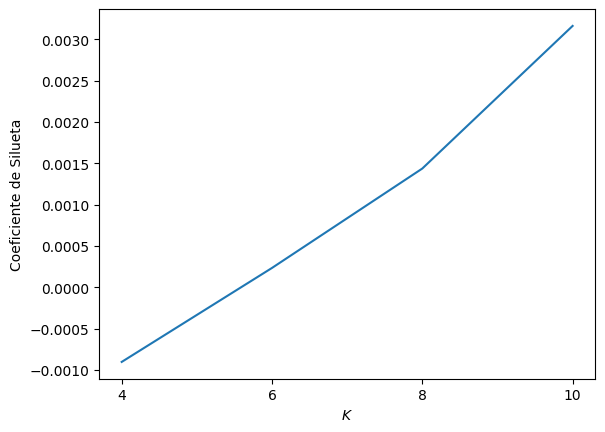

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, metrics)
ax.set_xlabel("$K$")
ax.set_ylabel("Coeficiente de Silueta")
ax.set_xticks(k_range)
fig.show()

La distribución de los clusters encontrados en el corpus está dada por el siguiente gráfico:

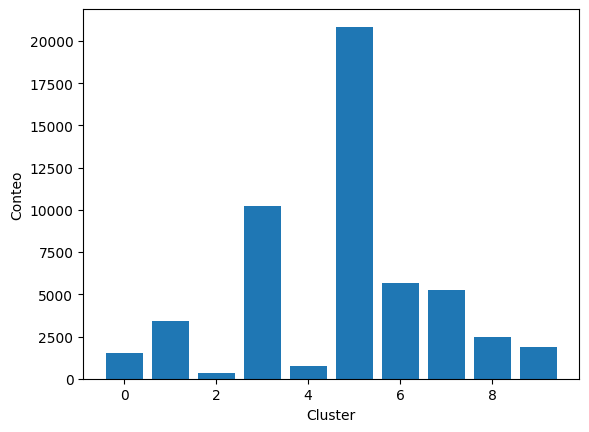

In [ ]:
clusters = best_model.predict(reduced_features)
cats, counts = np.unique(clusters, return_counts=True)
fig, ax = plt.subplots()
ax.bar(cats, counts)
ax.set_xlabel("Cluster")
ax.set_ylabel("Conteo")
fig.show()

De acuerdo a esta gráfica, los clusters no se encuentran uniformemente distribuidos. Ahora, vamos a intentar interpretar a qué hace referencia cada cluster.

Para esto, vamos a agrupar los textos preprocesados del conjunto de datos original según el cluster asignado por el modelo de K-means.

In [ ]:
predictions_kmeans = pd.DataFrame({"text": X_3, "cluster": clusters})
display(predictions_kmeans.head())

text  cluster
0                                            oh gosh        5
1    trouble sleep confused mind restless heart tune        5
2  wrong dear forward doubt stay restless restles...        5
3                                shift focus worried        5
4                  restless restless month boy mean         5

Extraemos todos los textos concatenados por cluster:

In [ ]:
grouped_texts = (
        predictions_kmeans
        .groupby("cluster")
        .agg({"text": lambda series: " ".join(series)})
        .reset_index()
        )
display(grouped_texts)

cluster                                               text
0        0  anxious mute wa understand hear cellphone ring...
1        1  worried want cry  know mind break want think f...
2        2  lately sudden suddenly happy suddenly sad sudd...
3        3  time hear friend want trial like nervous clear...
4        4  meet new boyfriend amazing kind sweet good stu...
5        5  oh gosh trouble sleep confused mind restless h...
6        6  control anxiety easy sound  time anxiety disor...
7        7  feel nervous know  confused feel good lately t...
8        8  time wake definitely nervous excited go try tm...
9        9  fuck life fucking hate fuck tired  fucking yea...

Con esto construimos la visualización de tipo nube de palabras para los clusters encontrados usando WordCloud:

In [ ]:
from wordcloud import WordCloud

Ahora se presentan los gráficos de nubes de palabras de todos los textos dentro de cada cluster específico.

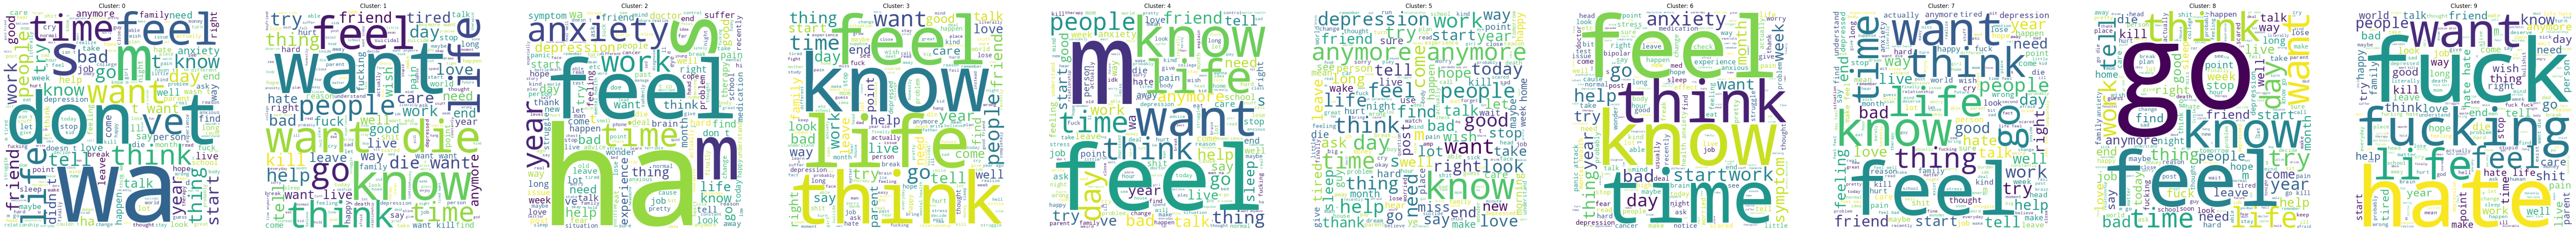

In [ ]:
fig, axes = plt.subplots(
    1,
    best_model.n_clusters,
    figsize=(10 * best_model.n_clusters, 10),
    )
for cluster in range(best_model.n_clusters):
    ax = axes[cluster]
    ax.set_title(f"Cluster: {cluster}")
    text = grouped_texts.loc[grouped_texts.cluster == cluster, "text"].iloc[0]
    wc = WordCloud(
        background_color="#FFFFFF",
        width=500,
        height=500
        ).generate(text)
    ax.imshow(wc)
    ax.axis("off")
fig.show()

No hay suficiente claridad para obtener patrones expecíficos del diagnóstico del estado mental por clúster, sin embargo de forma preliminar:

- Cluster 0: probablemente sentimientos negativos acerca de la vida.
- Cluster 1: pensamientos o expresiones con acciones relacionadas a querer y/o pensar en la muerte.
- Cluster 2 y 6: sentimientos asociados a ansiedad y depresión, principalmente puede tratarse sobre trabajo y quizás pedir ayuda.
- Cluster 3 y 4: la temática puede estar relacionada a sentimientos negativos sobre la vida y las personas, incluso sobre el amor.
- Cluster 7 y 8: pensamientos o expresiones con acciones relacionadas a sentir, ir y saber acerca del tiempo, la vida y el trabajo.
- Cluster 9: pensamientos o expresiones de ira, rabia, odio.


Los clusters y sus nubes de palabras brindan una comprensión cualitativa de los temas y el lenguaje asociado a cada estado mental, lo cual enriquece el análisis. Por tanto, el enfoque no supervisado con K-means aporta una perspectiva exploratoria y descriptiva, ya que ayuda a interpretar y comprender la estructura inherente del conjunto de textos.

Al aplicar el algoritmo, este no consideró las etiquetas existentes, por lo que simplemente agrupó los textos basándose en la similitud de las palabras que contenían.  Los clusters obtenidos no resultaron ser tan exactos como las etiquetas que ya presentaba el conjunto de datos. Por ejemplo, se encontró un cluster que mezclaba temas de suicidio y depresión, porque léxicamente son muy similares. Esto permite establecer que la línea entre un texto de depresión y uno de suicidio puede ser muy delgada, y que la diferencia podría estar en matices muy sutiles que los modelos supervisados pueden aprender a capturar.

K-means puede ir más allá de las etiquetas principales. Es posible que dentro de la categoría "depression", puedan haber diferentes sub categorías. Por ejemplo:
* Depresión por soledad: agrupando textos con palabras como "solo", "nadie", "amigos", "aislamiento".

* Depresión por anhedonia: agrupando textos con palabras como "nada", "disfrutar", "interés", "vacío", "aburrimiento".

Este nivel de detalle no se obtendría con un modelo supervisado que aprende las etiquetas ya establecidas, y es útil en caso de que se quiera entender cómo se manifiesta el lenguaje de la depresión, por ejemplo, en el conjunto de datos.

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*